In [31]:
import json
from pprint import pprint
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def convertToTime(t):
    index = t.find('+0000')
    lst = t.split('+0000')
    t = ''
    for l in lst:
        t = t + l
    return t

In [33]:
def yield_times(hst,mst):
    from datetime import date, time, datetime, timedelta
    start = datetime.combine(date.today(), time(hst, mst))
    yield start.strftime("%H:%M")
    while True:
        start += timedelta(seconds=600)
        yield start.strftime("%H:%M")

In [34]:
def generateTimeGap():
    gen = yield_times(9,30)
    t_seq = []
    for i in range(40):
        t_seq.append(gen.next())

    return t_seq

t_gap = generateTimeGap()

In [35]:
def formatTime(hour,minute):
    m = ''
    if hour < 10: 
        m = m + "0" + str(hour) + ":"
    else: 
        m = m + str(hour) + ":"
    if minute < 10:
        m = m + "0" + str(minute)
    else:
        m = m + str(minute)
    return m

In [6]:
# def groupTweetsByTime(fileName, t_gap):
#     f = open(fileName, 'r')
    
#     mydict = {}
#     i = 0
#     lst = []
#     for line in f:
#         if line.find('created_at') > 0:# filter the deleted tweets
#             tweet = json.loads(line)
#             t = time.strptime(convertToTime(tweet['created_at'])) # convert tweet time to HH:MM format 
#             t1 = formatTime(t.tm_hour, t.tm_min)# get time in format: HH:MM
#             tweet['time'] = t1
#             if t < t_gap[i]:
#                 lst.append(tweet)
#             else:
#                 mydict[t_gap[i]] = lst
#                 lst = [tweet]
#                 if i == len(t_gap)-1:
#                     break
#                 else:
#                     i += 1
#     f.close()
#     return mydict

In [8]:
# test group the tweets by time
# def generateTimeSeq():
#     lst = []
#     for i in xrange(9,15):
#         for j in xrange(0, 59):
#             m = ''
#             if i < 10: 
#                 m = m + "0" + str(i) + ":"
#             else: 
#                 m = m + str(i) + ":"
#             if j < 10:
#                 m = m + "0" + str(j)
#             else:
#                 m = m + str(j)
#             lst.append(m)
#     return lst


# my_seq = generateTimeSeq()

# mydict = {}
# i = 0
# lst = []
# for t in my_seq:
#     if t < t_gap[i]:
#         lst.append(t)
#     else:
#         mydict[t_gap[i]] = lst
#         lst = [t]
#         i += 1
# import pandas as pd

# p = pd.DataFrame(mydict.items())
# p.sort_values(0)


In [9]:
# from yahoo_finance import Share
# import time

# for i in xrange(5):
#     GSPC = Share("^GSPC")
#     IXIC = Share('^IXIC')
#     start = time.time()
#     price_dict = {}
#     GSPC.refresh()
#     IXIC.refresh()
#     price_dict["time"] = time.ctime()
#     price_dict["SP500"] = float(GSPC.get_price())
#     price_dict["nasdaq"] = float(IXIC.get_price())
#     print price_dict
#     end = time.time()
# #     print end - start
#     time.sleep(3)

In [36]:
f = open('data/day5/output5.json', 'r')
i = 0
for line in f:
    if line.find('created_at') > 0:
        i += 1
print i
f.close()

1122964


In [37]:
len(t_gap)

40

In [38]:
t_gap

['09:30',
 '09:40',
 '09:50',
 '10:00',
 '10:10',
 '10:20',
 '10:30',
 '10:40',
 '10:50',
 '11:00',
 '11:10',
 '11:20',
 '11:30',
 '11:40',
 '11:50',
 '12:00',
 '12:10',
 '12:20',
 '12:30',
 '12:40',
 '12:50',
 '13:00',
 '13:10',
 '13:20',
 '13:30',
 '13:40',
 '13:50',
 '14:00',
 '14:10',
 '14:20',
 '14:30',
 '14:40',
 '14:50',
 '15:00',
 '15:10',
 '15:20',
 '15:30',
 '15:40',
 '15:50',
 '16:00']

In [39]:
i/40

28074

In [40]:
def parseFinance(fileName, t_gap):
    f = open(fileName, 'r')

    sp500 = {}
    nasdaq = {}
    start = t_gap[0]
    end = t_gap[1]
    cursor = 0

    for line in f:
        if line.find('nasdaq') > 0:
            fjson = json.loads(line)
            t = time.strptime(convertToTime(fjson['time']))
            t = formatTime(t.tm_hour,t.tm_min)# get time in format: HH:MM
            fjson['time'] = t
            if t <= start:
                sp500[end] = fjson['SP500']
                nasdaq[end] = fjson['nasdaq']
                continue
            if t > start and t <= end:
                sp500[end] = fjson['SP500']
                nasdaq[end] = fjson['nasdaq']
                continue
            if t > end:
                for j in xrange(cursor, len(t_gap)):
                    if t > t_gap[j]:
                        continue
                    else:
                        cursor = j
                        start = t_gap[j-1]
                        end = t_gap[j]
                        sp500[end] = fjson['SP500']
                        nasdaq[end] = fjson['nasdaq']
                        break

    f.close()

    return sp500, nasdaq

In [42]:
sp500, nasdaq = parseFinance('data/day5/finance5.json', t_gap)

In [43]:
import nltk

In [44]:
from nltk.corpus import stopwords
sw = stopwords.words("english")

In [45]:
FiveMunitesCount = 28000

In [46]:
def groupTweetsByCount(fileName, t_gap): 
    f = open(fileName, 'r')  
    
    i = 0
    count = 0
    lst = []
    mydict = {}
    
    for line in f:
        if line.find('created_at') > 0:
            count += 1
            tweet = json.loads(line)
            lst.append(tweet['text'])
            
            if count == FiveMunitesCount:
                mydict[t_gap[i]] = lst
                i += 1
                lst = []
                count = 0
            elif i == (len(t_gap) -1):
                mydict[t_gap[i]] = lst
                
    f.close()
    return mydict

In [47]:
mydict = groupTweetsByCount('data/day5/output5.json',t_gap)

In [48]:
# f = open('output3.json','r')
# lst = []
# for line in f:
#     if line.find('created_at') > 0:
#         tweet = json.loads(line)
#         lst.append(tweet['text'])
# f.close()
# words = [ w for t in lst 
#               for w in t.split() ]
# cleaned_words = [item.lower() for item in words if item not in sw]

# mypd = pd.DataFrame(cleaned_words)
# mypd.columns = ['word']

# merged_positive = pd.merge(left=positives, right=mypd, how='right', on='word')
# print(merged_positive.head())
# merged_negative = pd.merge(left=negatives, right=mypd, how='right', on='word')
# print(merged_negative.head())
len(mydict)

40

In [49]:
# split to the words and remove the stopwords
for key in mydict.keys():
    words = [ w for t in mydict[key] 
              for w in t.split() ]
    cleaned_words = [item.lower() for item in words if item not in sw]
    mydict[key] = cleaned_words


In [50]:
positives = pd.read_csv('positives.csv')
negatives = pd.read_csv('negatives.csv')

In [51]:
ratios = {}
diffs = {}
for key in mydict.keys():
    mypd = pd.DataFrame(mydict[key])
    mypd.columns = ['word']
    merged_positive = pd.merge(left=positives, right=mypd, how='right', on='word')
    merged_negative = pd.merge(left=negatives, right=mypd, how='right', on='word')
    merged_positive['value'].fillna(0, inplace=True)
    merged_negative['value'].fillna(0, inplace=True)
    pn_ratio = sum(merged_positive['value'])/abs(sum(merged_negative['value']))
    ratios[key] = pn_ratio
    diffs[key] = sum(merged_positive['value']) - abs(sum(merged_negative['value']))

In [52]:
pd_ratios = pd.DataFrame(ratios.items(), columns=['time', 'value'])
pd_diffs = pd.DataFrame(diffs.items(), columns=['time', 'value'])
pd_nasdaq = pd.DataFrame(nasdaq.items(), columns=['time', 'index'])
pd_sp500 = pd.DataFrame(sp500.items(), columns=['time', 'index'])

merge1 = pd.merge(left=pd_ratios, right=pd_nasdaq, how='inner', on='time').sort_values('time')
merge2 = pd.merge(left=pd_ratios, right=pd_sp500, how='inner', on='time').sort_values('time')
merge3 = pd.merge(left=pd_diffs, right=pd_nasdaq, how='inner', on='time').sort_values('time')
merge4 = pd.merge(left=pd_diffs, right=pd_sp500, how='inner', on='time').sort_values('time')


In [53]:
merge1.to_csv('data/day5/day5_merge1.csv')
merge2.to_csv('data/day5/day5_merge2.csv')
merge3.to_csv('data/day5/day5_merge3.csv')
merge4.to_csv('data/day5/day5_merge4.csv')

In [54]:
import statsmodels.tsa.stattools

In [55]:
test1 = statsmodels.tsa.stattools.grangercausalitytests(merge1[['value','index']], 5)



Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=9.9720  , p=0.0034  , df_denom=33, df_num=1
ssr based chi2 test:   chi2=10.8786 , p=0.0010  , df=1
likelihood ratio test: chi2=9.5055  , p=0.0020  , df=1
parameter F test:         F=9.9720  , p=0.0034  , df_denom=33, df_num=1

Granger Causality
('number of lags (no zero)', 2)
ssr based F test:         F=4.4466  , p=0.0204  , df_denom=30, df_num=2
ssr based chi2 test:   chi2=10.3754 , p=0.0056  , df=2
likelihood ratio test: chi2=9.0867  , p=0.0106  , df=2
parameter F test:         F=4.4466  , p=0.0204  , df_denom=30, df_num=2

Granger Causality
('number of lags (no zero)', 3)
ssr based F test:         F=4.5628  , p=0.0104  , df_denom=27, df_num=3
ssr based chi2 test:   chi2=17.2373 , p=0.0006  , df=3
likelihood ratio test: chi2=13.9436 , p=0.0030  , df=3
parameter F test:         F=4.5628  , p=0.0104  , df_denom=27, df_num=3

Granger Causality
('number of lags (no zero)', 4)
ssr based F test:         F=2.3325

In [56]:
test2 = statsmodels.tsa.stattools.grangercausalitytests(merge2[['value','index']], 5)


Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=10.0094 , p=0.0033  , df_denom=33, df_num=1
ssr based chi2 test:   chi2=10.9194 , p=0.0010  , df=1
likelihood ratio test: chi2=9.5368  , p=0.0020  , df=1
parameter F test:         F=10.0094 , p=0.0033  , df_denom=33, df_num=1

Granger Causality
('number of lags (no zero)', 2)
ssr based F test:         F=4.6663  , p=0.0172  , df_denom=30, df_num=2
ssr based chi2 test:   chi2=10.8881 , p=0.0043  , df=2
likelihood ratio test: chi2=9.4800  , p=0.0087  , df=2
parameter F test:         F=4.6663  , p=0.0172  , df_denom=30, df_num=2

Granger Causality
('number of lags (no zero)', 3)
ssr based F test:         F=4.9513  , p=0.0072  , df_denom=27, df_num=3
ssr based chi2 test:   chi2=18.7048 , p=0.0003  , df=3
likelihood ratio test: chi2=14.9038 , p=0.0019  , df=3
parameter F test:         F=4.9513  , p=0.0072  , df_denom=27, df_num=3

Granger Causality
('number of lags (no zero)', 4)
ssr based F test:         F=2.6964

In [57]:
test3 = statsmodels.tsa.stattools.grangercausalitytests(merge3[['value','index']], 5)


Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=5.7927  , p=0.0218  , df_denom=33, df_num=1
ssr based chi2 test:   chi2=6.3193  , p=0.0119  , df=1
likelihood ratio test: chi2=5.8221  , p=0.0158  , df=1
parameter F test:         F=5.7927  , p=0.0218  , df_denom=33, df_num=1

Granger Causality
('number of lags (no zero)', 2)
ssr based F test:         F=1.5765  , p=0.2233  , df_denom=30, df_num=2
ssr based chi2 test:   chi2=3.6786  , p=0.1589  , df=2
likelihood ratio test: chi2=3.4978  , p=0.1740  , df=2
parameter F test:         F=1.5765  , p=0.2233  , df_denom=30, df_num=2

Granger Causality
('number of lags (no zero)', 3)
ssr based F test:         F=2.1887  , p=0.1125  , df_denom=27, df_num=3
ssr based chi2 test:   chi2=8.2685  , p=0.0408  , df=3
likelihood ratio test: chi2=7.4011  , p=0.0602  , df=3
parameter F test:         F=2.1887  , p=0.1125  , df_denom=27, df_num=3

Granger Causality
('number of lags (no zero)', 4)
ssr based F test:         F=1.0441

In [58]:
test4 = statsmodels.tsa.stattools.grangercausalitytests(merge4[['value','index']], 5)


Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=4.7434  , p=0.0367  , df_denom=33, df_num=1
ssr based chi2 test:   chi2=5.1746  , p=0.0229  , df=1
likelihood ratio test: chi2=4.8349  , p=0.0279  , df=1
parameter F test:         F=4.7434  , p=0.0367  , df_denom=33, df_num=1

Granger Causality
('number of lags (no zero)', 2)
ssr based F test:         F=1.3253  , p=0.2808  , df_denom=30, df_num=2
ssr based chi2 test:   chi2=3.0925  , p=0.2131  , df=2
likelihood ratio test: chi2=2.9634  , p=0.2273  , df=2
parameter F test:         F=1.3253  , p=0.2808  , df_denom=30, df_num=2

Granger Causality
('number of lags (no zero)', 3)
ssr based F test:         F=2.0945  , p=0.1244  , df_denom=27, df_num=3
ssr based chi2 test:   chi2=7.9125  , p=0.0479  , df=3
likelihood ratio test: chi2=7.1136  , p=0.0684  , df=3
parameter F test:         F=2.0945  , p=0.1244  , df_denom=27, df_num=3

Granger Causality
('number of lags (no zero)', 4)
ssr based F test:         F=1.1065

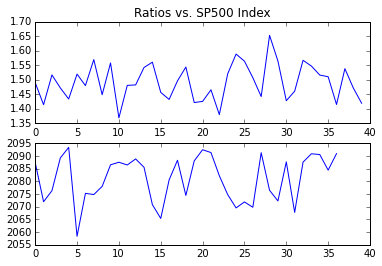

In [59]:
plt.figure(1)

plt.subplot(211)
plt.plot(pd_ratios['value'])
plt.title("Ratios vs. SP500 Index")

plt.subplot(212)
plt.plot(pd_sp500['index'])


plt.show()